In [12]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

# %matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

import warnings

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

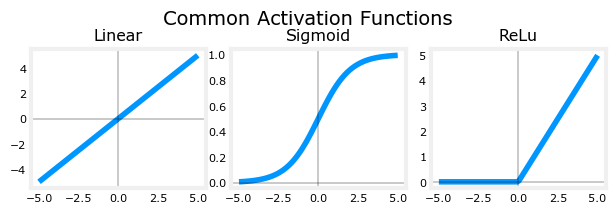

In [5]:
# Activations
plt_act_trio()

In [6]:
# Softmax
def softmax(z):
    N = len(z)
    a = np.zeros(N)
    ezz_sum = 0
    for k in range(N):
        ezz_sum += np.exp(z[k])
    for j in range(N):
        a[j] = np.exp(z[j]) / ezz_sum
    return a


In [7]:
# Check softmax function
z = np.array([1., 2., 3., 4.])
a = softmax(z)

atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


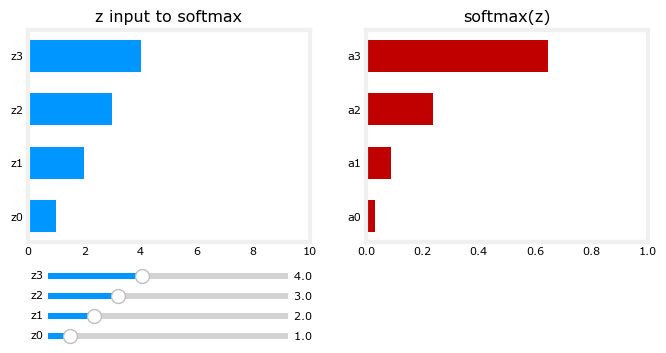

In [8]:
plt.close('all')
plt_softmax(softmax)

In [10]:
# Load Dataaset
x, y = load_data()
x.shape, y.shape

((5000, 400), (5000, 1))

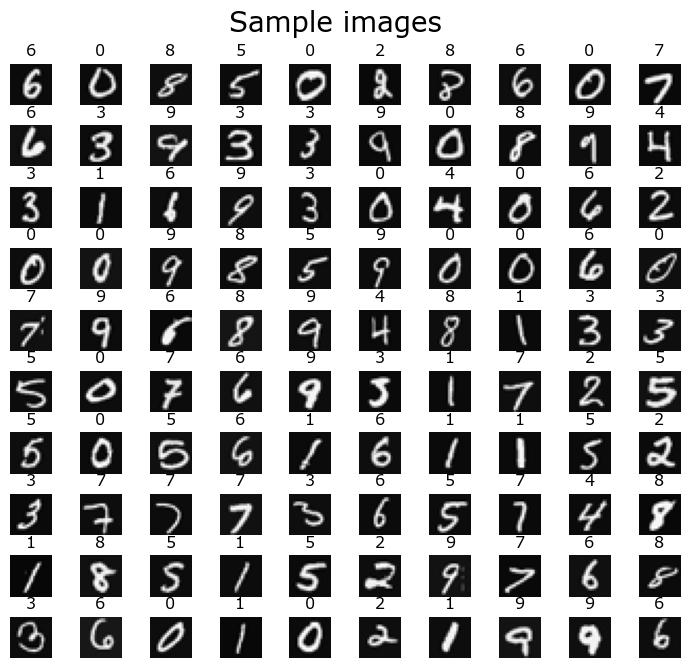

In [28]:
# Visualize the data
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = x.shape

fig, axes = plt.subplots(10,10, figsize=(7,7))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

widgvis(fig)
for i, ax in enumerate(axes.flat):
    # Select random
    random_idx = np.random.randint(m)
    # Reshape
    x_rand_rshaped = x[random_idx].reshape((20,20)).T
    
    # Display image
    ax.imshow(x_rand_rshaped, cmap='gray')
    
    # Display label
    ax.set_title(y[random_idx,0])
    ax.set_axis_off()
    fig.suptitle("Sample images", fontsize=20)

In [29]:
# Model Rep
tf.random.set_seed(30)
model = Sequential([
    tf.keras.Input(shape=(400,)),
    Dense(25, activation='relu', name='L1'),
    Dense(15, activation='relu', name='L2'),
    Dense(10, activation='linear', name='L3'),
], name='digit_recognition')


In [30]:
model.summary()

Model: "digit_recognition"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10575 (41.31 KB)
Trainable params: 10575 (41.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
[layer1, layer2, layer3] = model.layers
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [33]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(x,y, epochs=40)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 1.4368
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.5944
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.4053
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3349
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2938
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2685
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2477
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2336
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2190
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2047
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1957
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1844
Epoch 13/40
157/157 [====

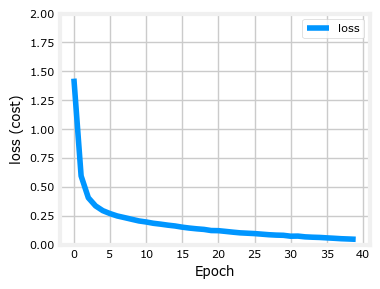

In [34]:
plot_loss_tf(history)

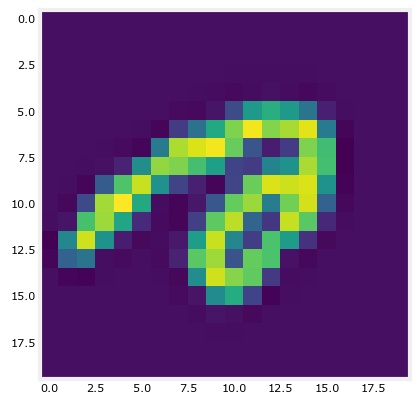

In [39]:
# Prediction manually
img = x[3000].reshape((20,20))
plt.imshow(img)
plt.show()

In [40]:
prediction = model.predict(x[3000].reshape(1,400)) # prediction
print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 90ms/step
 predicting a Two: 
[[-3.82 -4.71  5.2  -4.03  0.99 -2.54 15.44 -9.79 -4.4  -1.76]]
 Largest Prediction index: 6


1/1 [==============================] - 0s 22ms/step


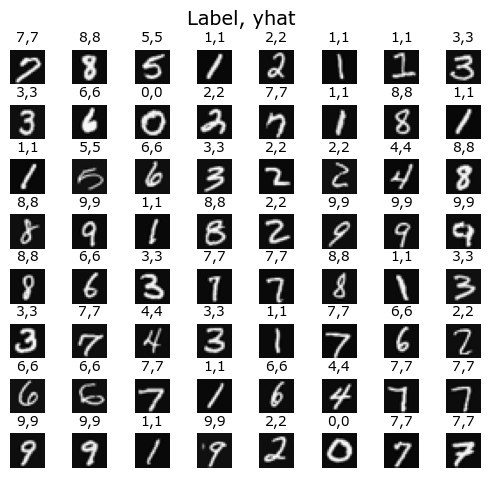

In [42]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = x.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(x[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

1/1 [==============================] - 0s 21ms/step
66 errors out of 5000 images


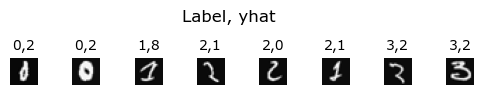

In [44]:
print( f"{display_errors(model,x,y)} errors out of {len(x)} images")

In [46]:
print(f"Accuracy: {(5000-66)/5000}%")

Accuracy: 0.9868%
